In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 
dataset = pd.read_csv("C:/Users/sivav/Downloads/HousePricePrediction.csv")
print(dataset.head(5))

   Id  MSSubClass MSZoning  LotArea LotConfig BldgType  OverallCond  \
0   0          60       RL     8450    Inside     1Fam            5   
1   1          20       RL     9600       FR2     1Fam            8   
2   2          60       RL    11250    Inside     1Fam            5   
3   3          70       RL     9550    Corner     1Fam            5   
4   4          60       RL    14260       FR2     1Fam            5   

   YearBuilt  YearRemodAdd Exterior1st  BsmtFinSF2  TotalBsmtSF  SalePrice  
0       2003          2003     VinylSd         0.0        856.0   208500.0  
1       1976          1976     MetalSd         0.0       1262.0   181500.0  
2       2001          2002     VinylSd         0.0        920.0   223500.0  
3       1915          1970     Wd Sdng         0.0        756.0   140000.0  
4       2000          2000     VinylSd         0.0       1145.0   250000.0  


In [5]:
o = (dataset.dtypes == 'object')
oc = list(o[o].index)
print(len(oc))
i = (dataset.dtypes == 'int')
nc = list(i[i].index)
print(len(nc))
f = (dataset.dtypes == 'float')
fc = list(f[f].index)
print(len(fc))

4
0
3


<AxesSubplot:>

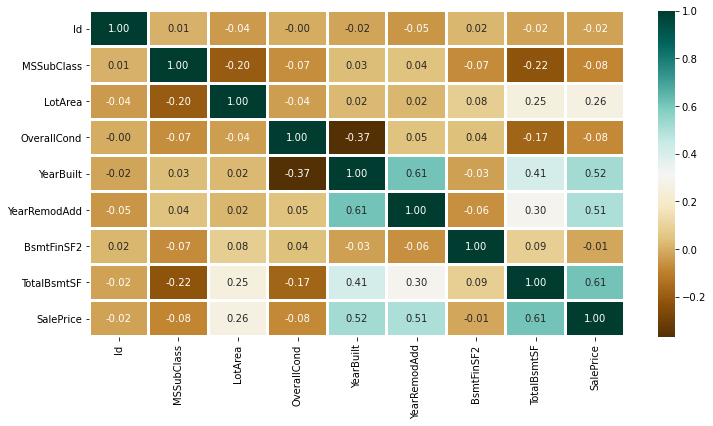

In [6]:
plt.figure(figsize=(12, 6))
sns.heatmap(dataset.corr(),cmap = 'BrBG',fmt = '.2f',linewidths = 2,annot = True)

<AxesSubplot:title={'center':'Categorical Features'}>

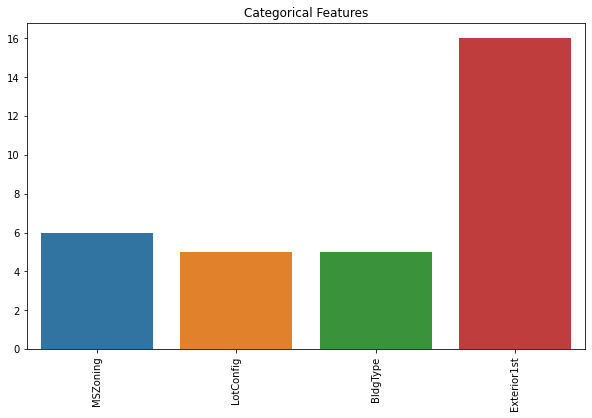

In [8]:
u = []
for i in oc:
    u.append(dataset[i].unique().size)
plt.figure(figsize=(10,6))
plt.title('Categorical Features')
plt.xticks(rotation=90)
sns.barplot(x=oc,y=u)

In [9]:
dataset.drop(['Id'], axis=1,inplace=True)
dataset['SalePrice'] = dataset['SalePrice'].fillna(dataset['SalePrice'].mean())
new_dataset = dataset.dropna()
new_dataset.isnull().sum()

MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [20]:
from sklearn.preprocessing import OneHotEncoder
s = (new_dataset.dtypes == 'object')
obcs = list(s[s].index)
print(obcs)
print(len(obcs))
encoder = OneHotEncoder(sparse=False)
cols = pd.DataFrame(encoder.fit_transform(new_dataset[obcs]))
cols.index = new_dataset.index
cols.columns = encoder.get_feature_names()
final = new_dataset.drop(obcs, axis=1)
final = pd.concat([final, cols], axis=1)

['MSZoning', 'LotConfig', 'BldgType', 'Exterior1st']
4


In [21]:
from sklearn.model_selection import train_test_split
x = final.drop(['SalePrice'], axis=1)
y = final['SalePrice']
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=0)

In [22]:
from sklearn.linear_model import LinearRegression
classifier = LinearRegression()
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

In [23]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test,y_pred)

0.18741683841600162